In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

In [3]:
manatees = pd.read_csv("/Users/julieraeboucher/Desktop/Work/Mentorship /Curriculum/3. Datasets/manatees.csv")

## Data Wrangling
Fortunately, there is no additional data wrangling required to be able to run linear regression in Python either.

---

## Test Assumptions

Next, you will learn how to test the linear regression assumptions in Python.

---

## Testing for Linearity and Normality

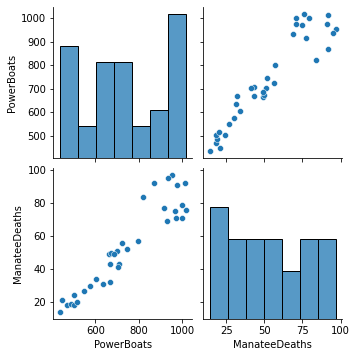

In [4]:
sns.pairplot(manatees)

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PowerBoats', ylabel='Density'>

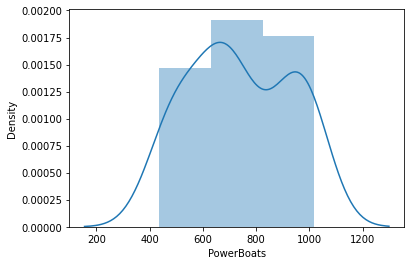

In [5]:
sns.distplot(manatees['PowerBoats'])

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ManateeDeaths', ylabel='Density'>

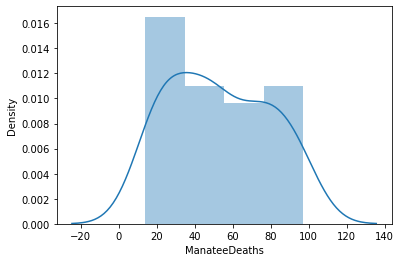

In [6]:
sns.distplot(manatees['ManateeDeaths'])

### Are these variables normally distributed? It's a tough call, but roughly, yes.
---

## Testing for Homoscedasticity

### Create the Basic Model

In [10]:
# variables to an x-independent and y-dependent
x = manatees['PowerBoats']
y = manatees['ManateeDeaths']

In [11]:
# If you want to look at these, simply type in x or y. 
# Build your model. 
model = sm.OLS(y,x).fit()

### Test for Homoscedasticity
Unlike R, Python doesn't calculate residuals for you. Remember that the residual, or error term, is just the true values (your y from your dataset) minus the predicted values your model found. Calculate out your residuals:


In [12]:
pred_val = model.fittedvalues.copy()
true_val = manatees['ManateeDeaths'].values.copy()
residual = true_val - pred_val

The first line creates your predicted values, which have been called `pred_val`. Simply copy the fitted values from your model named model. Similarly, to get your true values into a useable form, called `true_val`, you just need to copy your dependent variable from your original dataset. Then you can subtract your predicted values from your true values in a new item called `residual`.

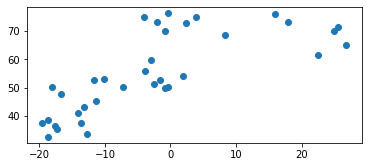

In [13]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

Double check your graph with some statistics? statsmodels has a couple different options. The first is the Breusch Pagan test you ran in R. You can call the `diagnostic.het_breuschpagan` function out of the `sms` package. You will feed in your `residual` variable, then the dataset and the independent variable.

In [14]:
sms.diagnostic.het_breuschpagan(residual, manatees[['PowerBoats']])

(14.786518579352663, nan, 24.871600356010827, 1.7849503580150606e-05)

The numbers in the output above mean the following, with left to right discussed from top to bottom:
- 14.79: This is the lagrange multiplier statistic (ignore)
- nan: This is the p value for the lagrange multiplier statistic (ignore)
- 24.87: This is the F value to test for homoscedasticity. Like all F values, the bigger it is, the more likely it is to be statistically significant.
- .0000018: This is the p value to test for homoscedasticity. If it is < .05 (stastically significant), then this means you have violated the assumption of homoscedasticity and your data is, in fact, heteroscedastic.
